***Create dataset***

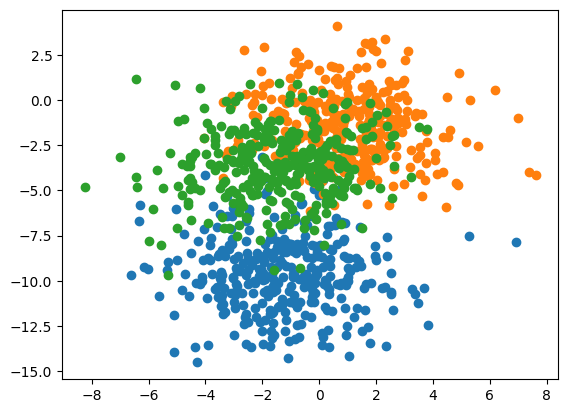

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
  # select indices of points with the class label
  row_ix = np.where(y == class_value)
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

*****Changing no of nodes*****

Epoch 1/100
21/21 [==============================] - 1s 4ms/step - loss: 1.2740 - accuracy: 0.2657
Epoch 2/100
21/21 [==============================] - 0s 3ms/step - loss: 1.1254 - accuracy: 0.3522
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 1.1007 - accuracy: 0.3612
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 1.0910 - accuracy: 0.3627
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 1.0853 - accuracy: 0.3657
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 1.0802 - accuracy: 0.3687
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 1.0765 - accuracy: 0.3761
Epoch 8/100
21/21 [==============================] - 0s 3ms/step - loss: 1.0728 - accuracy: 0.3776
Epoch 9/100
21/21 [==============================] - 0s 5ms/step - loss: 1.0692 - accuracy: 0.3791
Epoch 10/100
21/21 [==============================] - 0s 6ms/step - loss: 1.0654 - accuracy: 0.3821
Epoch 11/

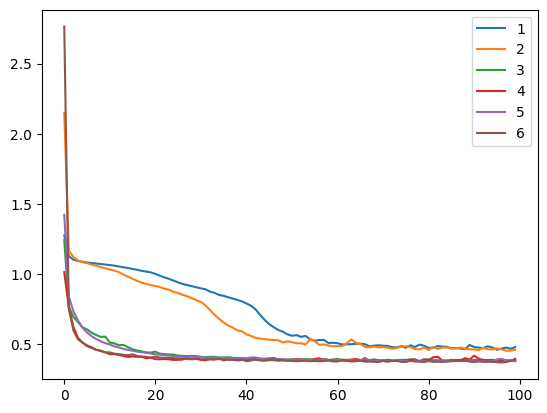

In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(n_nodes, X_train, X_test, y_train, y_test):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(n_nodes, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, epochs=100, verbose=1)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history, test_acc


X_train, X_test, y_train, y_test = create_dataset()
for i in range(1, 7):
  history, test_acc = evaluate_model(i, X_train, X_test, y_train, y_test)
  plt.plot(history.history['loss'], label=str(i))

# show the plot
plt.legend()
plt.show()


**Changing no of layers**

Epoch 1/100
21/21 [==============================] - 1s 2ms/step - loss: 1.3525 - accuracy: 0.5358
Epoch 2/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6560 - accuracy: 0.7179
Epoch 3/100
21/21 [==============================] - 0s 2ms/step - loss: 0.6031 - accuracy: 0.7433
Epoch 4/100
21/21 [==============================] - 0s 2ms/step - loss: 0.5241 - accuracy: 0.7761
Epoch 5/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4990 - accuracy: 0.7925
Epoch 6/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4826 - accuracy: 0.8015
Epoch 7/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4734 - accuracy: 0.8090
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4511 - accuracy: 0.8134
Epoch 9/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8209
Epoch 10/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8239
Epoch 11/

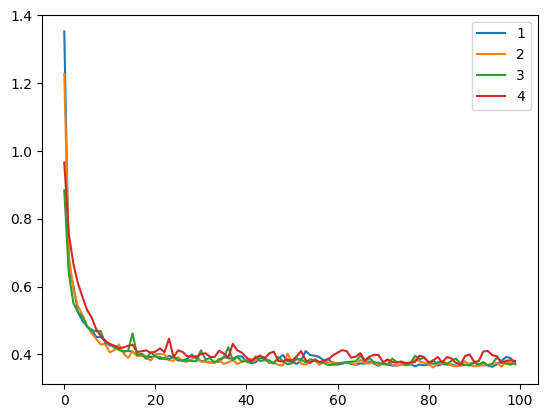

In [3]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(n_layers, X_train, X_test, y_train, y_test):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(10, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  for i in range(n_layers-1):
    model.add(Dense(10, activation='relu'))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=0.9)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, epochs=100, verbose=1)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history, test_acc


X_train, X_test, y_train, y_test = create_dataset()
for i in range(1, 5):
  history, test_acc = evaluate_model(i, X_train, X_test, y_train, y_test)
  plt.plot(history.history['loss'], label=str(i))

# show the plot
plt.legend()
plt.show()
